In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#df = pd.read_csv('pis/Mushroom/agaricus-lepiota.data', header=None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df.iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df[0].value_counts()

0
e    4208
p    3916
Name: count, dtype: int64

In [23]:
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0)
print(p0,z0)
cnt

0.48202855736090594 -0.07191675076714477


0
e    4208
p    3916
Name: count, dtype: int64

In [24]:
df[2].value_counts()

2
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [25]:
df[[6,0]].value_counts()

6  0
f  e    4016
   p    3898
a  e     192
   p      18
Name: count, dtype: int64

In [26]:
print(df.groupby([6,0]).count())
print(df.groupby([6,0])[0].count())

       1     2     3     4     5     7     8     9     10    11  ...    13  \
6 0                                                              ...         
a e   192   192   192   192   192   192   192   192   192   192  ...   192   
  p    18    18    18    18    18    18    18    18    18    18  ...    18   
f e  4016  4016  4016  4016  4016  4016  4016  4016  4016  4016  ...  4016   
  p  3898  3898  3898  3898  3898  3898  3898  3898  3898  3898  ...  3898   

       14    15    16    17    18    19    20    21    22  
6 0                                                        
a e   192   192   192   192   192   192   192   192   192  
  p    18    18    18    18    18    18    18    18    18  
f e  4016  4016  4016  4016  4016  4016  4016  4016  4016  
  p  3898  3898  3898  3898  3898  3898  3898  3898  3898  

[4 rows x 21 columns]
6  0
a  e     192
   p      18
f  e    4016
   p    3898
Name: 0, dtype: int64


In [27]:
df.groupby(6)[0].value_counts().unstack()#.fillna(0)

,e,p
6,,
a,192,18
f,4016,3898


In [28]:
#df.groupby(0)[1].count()
df.groupby(5)[0].value_counts().unstack().fillna(0).astype(int)

,e,p
5,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


In [29]:
df.groupby(5)[0].value_counts().unstack().fillna(0).astype(int).min(axis=1).sum()

120

Визуализировать можно не всё, а штук пять

<Axes: xlabel='5'>

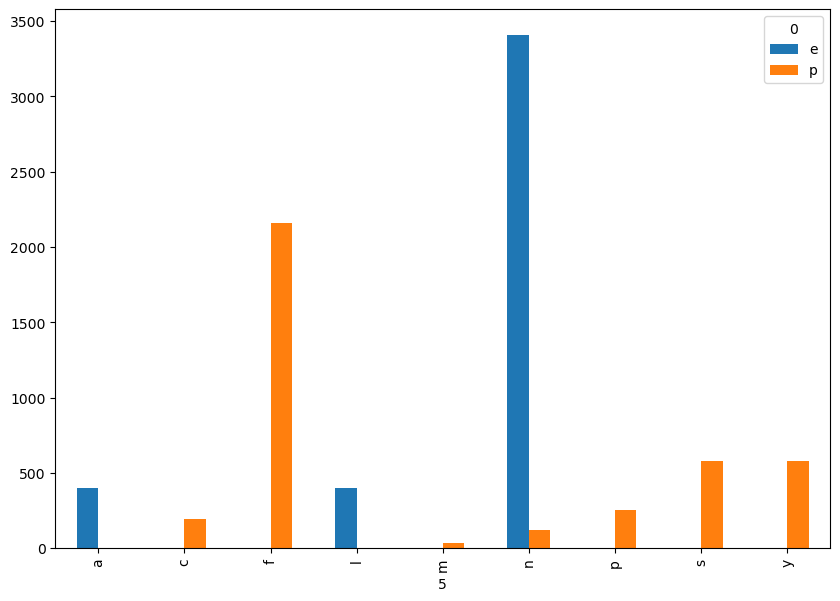

In [30]:
df.groupby(5)[0].value_counts().unstack().fillna(0).plot.bar(figsize=(10,7))

In [31]:
f9 = df.groupby(9)[0].value_counts().unstack().fillna(0)
f9['prob'] = (f9['p']+1)/(f9['p']+f9['e']+2)#f9.sum(axis=1)
f9['pred'] = f9['prob'].map(lambda x: 'e' if x<0.5 else 'p')
f9

,e,p,prob,pred
9,,,,
b,0.0,1728.0,0.999422,p
e,96.0,0.0,0.010204,e
g,248.0,504.0,0.669761,p
h,204.0,528.0,0.720708,p
k,344.0,64.0,0.158537,e
n,936.0,112.0,0.107619,e
o,64.0,0.0,0.015152,e
p,852.0,640.0,0.429050,e
r,0.0,24.0,0.961538,p


In [32]:
f9t = df.groupby(9)[0].value_counts().unstack().fillna(0).T
#f9['prob'] = (f9['p']+1)/(f9['p']+f9['e']+2)#f9.sum(axis=1)
#f9['pred'] = f9['prob'].map(lambda x: 'e' if x<0.5 else 'p')
f9t.div(f9t.sum(axis=1),axis=0)
#f9t

9,b,e,g,h,k,n,o,p,r,u,w,y
0,,,,,,,,,,,,
e,0.000000,0.022814,0.058935,0.048479,0.081749,0.222433,0.015209,0.202471,0.000000,0.105513,0.227186,0.015209
p,0.441267,0.000000,0.128703,0.134831,0.016343,0.028601,0.000000,0.163432,0.006129,0.012257,0.062819,0.005618


In [33]:
(f9['p']>f9['e']).map({True:'p',False:'e'})

9
b    p
e    e
g    p
h    p
k    e
n    e
o    e
p    e
r    p
u    e
w    e
y    e
dtype: object

In [34]:
# f9['prob'].loc[df[9]]

In [35]:
#df['prob9'] = df[9].map(f9['prob'])
#df['prob9'] = df[9].map(lambda x: f9['prob'][x])
df['prob9'] = df[9].map(lambda x: f9.at[x,'prob'])
f9.loc[df[9],'prob']
df['prob9'] = list(map(lambda x: f9['prob'][x],list(df[9].values)))
df['inv_sig9'] = np.log(df['prob9']) - np.log(1.0 - df['prob9']) - z0
df['sig9'] = 1.0/(1.0+np.exp(-(df['inv_sig9']+z0)))
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,prob9,inv_sig9,sig9
0,p,x,s,n,t,p,f,c,n,k,...,p,w,o,p,k,s,u,0.158537,-1.669157,0.158537
1,e,x,s,y,t,a,f,c,b,k,...,p,w,o,p,n,n,g,0.158537,-1.669157,0.158537
2,e,b,s,w,t,l,f,c,b,n,...,p,w,o,p,n,n,m,0.107619,-2.115295,0.107619
3,p,x,y,w,t,p,f,c,n,n,...,p,w,o,p,k,s,u,0.107619,-2.115295,0.107619
4,e,x,s,g,f,n,f,w,b,k,...,p,w,o,e,n,a,g,0.158537,-1.669157,0.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,p,o,o,p,b,c,l,0.261364,-1.038893,0.261364
8120,e,x,s,n,f,n,a,c,b,y,...,p,n,o,p,b,v,l,0.261364,-1.038893,0.261364
8121,e,f,s,n,f,n,a,c,b,n,...,p,o,o,p,b,c,l,0.107619,-2.115295,0.107619
8122,p,k,y,n,f,y,f,c,n,b,...,p,w,o,e,w,v,l,0.999422,7.455298,0.999422


In [18]:
for i in range(1,23):
  f = df.groupby(i)[0].value_counts().unstack().fillna(0)
  f['prob'] = (f['p']+1)/(f['p']+f['e']+2)
  P = df[i].map(lambda x: f.at[x,'prob'])
  df['inv_sig%i'%i] = np.log(P) - np.log(1.0 - P) - z0

df

,0,1,2,3,4,5,6,7,8,9,...,inv_sig13,inv_sig14,inv_sig15,inv_sig16,inv_sig17,inv_sig18,inv_sig19,inv_sig20,inv_sig21,inv_sig22
0,p,x,s,n,t,p,f,c,n,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
1,e,x,s,y,t,a,f,c,b,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718
2,e,b,s,w,t,l,f,c,b,n,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241
3,p,x,y,w,t,p,f,c,n,n,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
4,e,x,s,g,f,n,f,w,b,k,...,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8120,e,x,s,n,f,n,a,c,b,y,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314
8121,e,f,s,n,f,n,a,c,b,n,...,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8122,p,k,y,n,f,y,f,c,n,b,...,2.773509,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314


In [ ]:
'aaaaa %i --- %g  .... %i _____ (%s) '%(2.5,4.5,5**2,'xxx')

'aaaaa 2 --- 4.5  .... 25 _____ (xxx) '

In [ ]:
df.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,  'inv_sig1',  'inv_sig2',
        'inv_sig3',  'inv_sig4',  'inv_sig5',  'inv_sig6',  'inv_sig7',
        'inv_sig8',  'inv_sig9', 'inv_sig10', 'inv_sig11', 'inv_sig12',
       'inv_sig13', 'inv_sig14', 'inv_sig15', 'inv_sig16', 'inv_sig17',
       'inv_sig18', 'inv_sig19', 'inv_sig20', 'inv_sig21', 'inv_sig22'],
      dtype='object')

In [ ]:
df[[s for s in df.columns[23:] if s!='inv_sig5']]
X = df[[s for s in df.columns if (s!='inv_sig5') and (type(s) is str)]]
X

,inv_sig1,inv_sig2,inv_sig3,inv_sig4,inv_sig6,inv_sig7,inv_sig8,inv_sig9,inv_sig10,inv_sig11,inv_sig12,inv_sig13,inv_sig14,inv_sig15,inv_sig16,inv_sig17,inv_sig18,inv_sig19,inv_sig20,inv_sig21,inv_sig22
0,-0.059491,0.282227,-0.142373,-1.410778,0.042102,0.306625,2.113002,-1.597240,0.233724,-1.141737,-0.790509,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
1,-0.059491,0.282227,0.589701,-1.410778,0.042102,0.306625,-0.767928,-1.597240,0.233724,-2.361697,-0.790509,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718
2,-2.040150,0.282227,-0.737281,-1.410778,0.042102,0.306625,-0.767928,-2.043379,0.233724,-2.361697,-0.790509,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241
3,-0.059491,0.217584,-0.737281,-1.410778,0.042102,0.306625,2.113002,-2.043379,0.233724,-1.141737,-0.790509,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678
4,-0.059491,0.282227,-0.172507,0.887336,0.042102,-2.291605,-0.767928,-1.597240,-0.179287,-1.141737,-0.790509,-0.722320,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.036790,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-0.966976,0.233724,0.964915,-0.790509,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8120,-0.059491,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-0.966976,0.233724,0.964915,-0.790509,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314
8121,0.046551,0.282227,-0.142373,0.887336,-2.246334,0.306625,-0.767928,-2.043379,0.233724,0.964915,-0.790509,-0.722320,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314
8122,1.036790,0.217584,-0.142373,0.887336,0.042102,0.306625,2.113002,7.527215,-0.179287,0.964915,-0.790509,2.773509,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314


In [ ]:
P = X.sum(axis=1) + z0
P = 1/(1+np.exp(-P))
P

0       1.494664e-03
1       5.418530e-08
2       3.475341e-10
3       4.952026e-04
4       2.957983e-07
            ...     
8119    1.649587e-10
8120    7.176957e-10
8121    2.088547e-11
8122    1.000000e+00
8123    5.511456e-11
Length: 8124, dtype: float64

In [ ]:
((P>0.5)==(df[0]=='p')).sum() / df.shape[0]

0.956548498276711

In [ ]:
np.exp(-P)

0       2.251166e+00
1       6.409096e+09
2       9.992654e+11
3       6.801470e+00
4       8.248591e+07
            ...     
8119    1.479110e+11
8120    3.399658e+10
8121    1.168238e+12
8122    2.807802e-11
8123    4.426996e+11
Length: 8124, dtype: float64

In [ ]:
df[9].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [ ]:
u9 = list(df[9].unique())
#u9.index('g')
df['lab9'] = df[9].map(lambda x: u9.index(x))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,lab9
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l,10
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l,10
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l,1
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l,8


In [ ]:
df['prob9'] = df[9].map(lambda x: f9['prob'][x])f9[['e','p']].min(axis=1).sum()

1584.0

In [ ]:
for i in range(1,23):
    f = df.groupby(i)[0].value_counts().unstack().fillna(0)
    print(i,1-f.min(axis=1).sum()/df.shape[0])

1 0.5642540620384047
2 0.5805022156573116
3 0.5952732644017725
4 0.7439684884293452
5 0.9852289512555391
6 0.517971442639094
7 0.6159527326440177
8 0.7562776957163959
9 0.8050221565731167
10 0.5529295913343181
11 0.6459871984244214
12 0.774495322501231
13 0.7661250615460364
14 0.7163958641063515
15 0.7144263909404234
16 0.517971442639094
17 0.5189561792220581
18 0.5381585425898572
19 0.775480059084195
20 0.8680452978828164
21 0.7218119153126539
22 0.690300344657804


In [ ]:
df.groupby(6)[0].value_counts().unstack().fillna(0)

,e,p
6,,
a,192,18
f,4016,3898


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

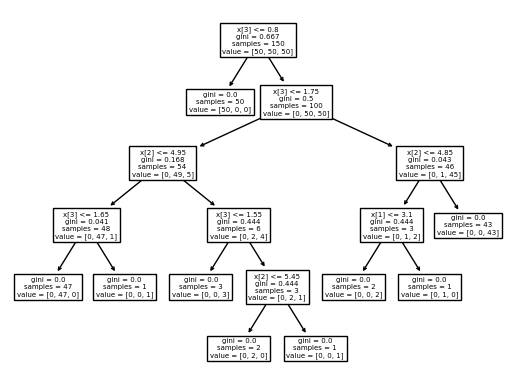

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)